# Data Exploration And Cleaning


### First Approach

To begin with, we are going to import the necessary modules, and using Pandas make a preliminary observation of the data (about which we so far have no idea)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

obs = pd.read_csv('observations.csv')
spec = pd.read_csv('species_info.csv')

print(f'Columns of the \'observations\' file are the following: {obs.columns}')
print (f'\'Observations\' file contains {obs.shape[0]} records')
print('\n')
print(obs.head(10))
print('\n')
print(f'Columns of the \'species\' file are the following: {spec.columns}')
print (f'\'Species\' file contains {spec.shape[0]} records')
print('\n')
print(spec.head(10))


Columns of the 'observations' file are the following: Index(['scientific_name', 'park_name', 'observations'], dtype='object')
'Observations' file contains 23296 records


                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone

So we have a table with "technical" details about species on the one hand, and on the other hand a table with observations of species in various parks.


In [2]:
print(obs.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


### Merge into unified dataframe

Our idea is to merge the two dataframes into one single dataframe without loss of information, rather than conducting in parallel analysis of the two dataframes. The resulting unified dataframe would list the species and their characteristics, and then the amount of observations for each park. This would not impair the easiness to read the table overall, because as shown in previous cell, there are only 4 parks.

But before merging, let's make sure that all the species that are observed are duly recorded in the species dataframe. If they aren't, we can't properly merge because basic information about some of the species observed will be missing.

In [3]:
count = 0
for name in obs.scientific_name.unique():    
    if not name in spec.scientific_name.unique():
        print(name)
        count+=1
print(count)


0


All species observed have their data recorded in the 'species' dataframe, so we can proceed safely to the merge

In [4]:
# Each species receives one column per park (there is one number of obs per species/park)

spec['Bryce'] = obs[obs.park_name == 'Bryce National Park']['observations'].reset_index(drop = True)
spec['Yellowstone'] = obs[obs.park_name == 'Yellowstone National Park']['observations'].reset_index(drop = True)
spec['Yosemite'] = obs[obs.park_name == 'Yosemite National Park']['observations'].reset_index(drop = True)
spec['Great Smoky Mountains'] = obs[obs.park_name == 'Great Smoky Mountains National Park']['observations'].reset_index(drop = True)
spec['total_obs'] = spec['Bryce'] + spec['Yellowstone'] + spec['Yosemite'] + spec['Great Smoky Mountains']


#We save the merged dataframe as 'data', and we will use it from now on

data = spec

print(data.head())


  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole                 NaN   
1                              American Bison, Bison                 NaN   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN   
4                                      Wapiti Or Elk                 NaN   

   Bryce  Yellowstone  Yosemite  Great Smoky Mountains  total_obs  
0     84          228       138                     68        518  
1    103          250       112                     77        542  
2    114          279       168                     85        646  


### Exploration and Optimization

Let's perform a few more steps to get to know better our data and how they vary at individual level, and see if some more optimization is possible

In [5]:
print(f'Species belong to {data.category.nunique()} categories: {data.category.unique()}\n')
print(f'There are {data.common_names.nunique()} common names available, and here is a sample: {(data.common_names.unique())[15:40]}\n')
print(f'There are {data.conservation_status.nunique()} different conservation statuses: {data.conservation_status.unique()}\n')
print('Least observed species')
print(data[data.total_obs == data.total_obs.min()][['scientific_name', 'common_names', 'total_obs']])
print('\n Most observed species')      
print(data[data.total_obs == data.total_obs.max()][['scientific_name', 'common_names', 'total_obs']])


Species belong to 7 categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

There are 5504 common names available, and here is a sample: ['Bobcat' 'Panther (Mountain Lion)' 'Striped Skunk'
 'Eastern Spotted Skunk' 'River Otter' 'Northern River Otter' 'Fisher'
 'Mink (Or Weasel)' 'Long-Tailed Weasel' 'Least Weasel' 'Mink'
 'Common Raccoon, Raccoon' 'Black Bear' "Rafinesque's Big-Eared Bat"
 'Big Brown Bat' 'Silver-Haired Bat' 'Eastern Red Bat, Red Bat'
 'Hoary Bat' 'Mississippi Myotis, Southeastern Myotis' 'Gray Myotis'
 "Keen's Myotis" 'Eastern Small-Footed Bat, Eastern Small-Footed Myotis'
 'Little Brown Bat, Little Brown Myotis'
 'Northern Long-Eared Bat, Northern Myotis'
 'Indiana Bat, Indiana Or Social Myotis']

There are 4 different conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']

Least observed species
            scientific_name                           common_names  total_obs
3962  Penstemon wh

We observe that there are 2 vegetal categories
We observe that there is often more than one common name for a species. We see as well that different species can pertain to the same animal, such as bat.
We observe that if a species is not in danger or in recovery, the 'conservation_status' is showing NaN. It doesn't mean that the information was unavailable, but rather that the species didn't need to be given a specific status.
We observe that the number of observations ranges from 307 to 721

In [6]:
# To eliminate any ambiguity, we replace the NaN(s) in the 'conservation_status' column by 'Not Endangered'
data = data.fillna(value = {'conservation_status': 'Not Endangered'})

print(data.conservation_status.value_counts())

conservation_status
Not Endangered        5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64


We observe that almost 97% of the species observed have the status 'Not Endangered', what we are glad to know

# Data Analysis

### Patterns in Conservation Status

We now have the dataframe in the state we want to have it. 
Our first axis of research is going to deal with the conservation status. 
We will answer the following questions:
* does the number of observations anyhow relates to the status (ie endangered species would be more watched in proportion than others)?
* at the park level, do we see variations in this distribution?
* are species of some categories more likely to be endangered than others?

In [7]:
# Let's compute the count of species and nb of observations per status.We create a custom dataframe

status = pd.DataFrame(data.conservation_status.value_counts())

status['status'] = ['Not Endangered', 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']
status.reset_index(drop = True, inplace = True)

total_obs = []
for stat in status.status:
    total_obs.append(data[data.conservation_status == stat].total_obs.sum())

status['total_obs'] = total_obs
status['count_%'] =100*(status['count'] / (status['count'].sum()))
status['total_obs_%'] = 100*(status['total_obs'] / (status['total_obs'].sum()))

status = status[['status', 'count', 'count_%', 'total_obs', 'total_obs_%']]

print(status)

               status  count    count_%  total_obs  total_obs_%
0      Not Endangered   5633  96.720467    3205999    96.719500
1  Species of Concern    161   2.764423      91272     2.753520
2          Endangered     16   0.274725       9259     0.279328
3          Threatened     10   0.171703       5876     0.177269
4         In Recovery      4   0.068681       2333     0.070383


For each status % of the count of species is the same as the % of the nb of observations
There is no status that is represented in the observations differently from how this status is represented in the set of species 

We explore the relationship between park and statuses, by creating a table showing the % of each status in observations in each park, and comparing it with total

In [8]:
Yos = []
Yell = []
Smoke = []
Bryce = []
for stat in data.conservation_status.unique():
    Yos.append(100*(data[data.conservation_status == stat].Yosemite.sum()/data.Yosemite.sum()))
    Yell.append(100*(data[data.conservation_status == stat].Yellowstone.sum()/data.Yellowstone.sum()))
    Smoke.append(100*(data[data.conservation_status == stat]['Great Smoky Mountains'].sum()/data['Great Smoky Mountains'].sum()))
    Bryce.append(100*(data[data.conservation_status == stat].Bryce.sum()/data.Bryce.sum()))

    
park_status = pd.DataFrame((Yos,Yell,Smoke,Bryce,status['total_obs_%']), index = ['Yosemite','Yellowstone','Great Smoky','Bryce','total'], columns = status.status)
print(park_status)


status       Not Endangered  Species of Concern  Endangered  Threatened  \
Yosemite          96.650651            2.823363    0.273823    0.182085   
Yellowstone       96.713615            2.749934    0.282357    0.181634   
Great Smoky       96.778287            2.712010    0.279978    0.167431   
Bryce             96.793368            2.688946    0.279502    0.166486   
total             96.719500            2.753520    0.279328    0.177269   

status       In Recovery  
Yosemite        0.070077  
Yellowstone     0.072460  
Great Smoky     0.062294  
Bryce           0.071698  
total           0.070383  


Observations per status are quite the same in each park, therefore they match the total value (no dispersion)
Consequently they match as well the proportions of each status in the species sample

To answer our third and last question for this part we will plot the proportion of statuses for each category

             category conservation_status  scientific_name
0           Amphibian          Endangered                1
1           Amphibian      Not Endangered               73
2           Amphibian  Species of Concern                4
3           Amphibian          Threatened                2
4                Bird          Endangered                4
5                Bird         In Recovery                3
6                Bird      Not Endangered              442
7                Bird  Species of Concern               72
8                Fish          Endangered                3
9                Fish      Not Endangered              116
10               Fish  Species of Concern                4
11               Fish          Threatened                4
12             Mammal          Endangered                7
13             Mammal         In Recovery                1
14             Mammal      Not Endangered              176
15             Mammal  Species of Concern               

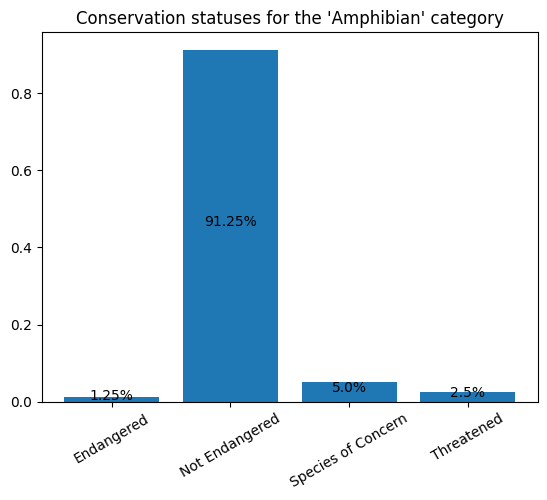

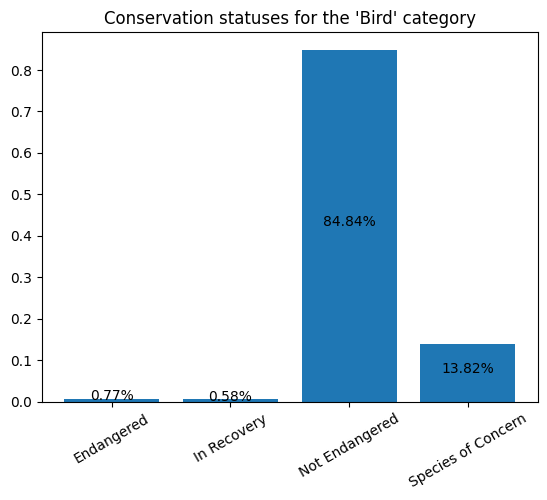

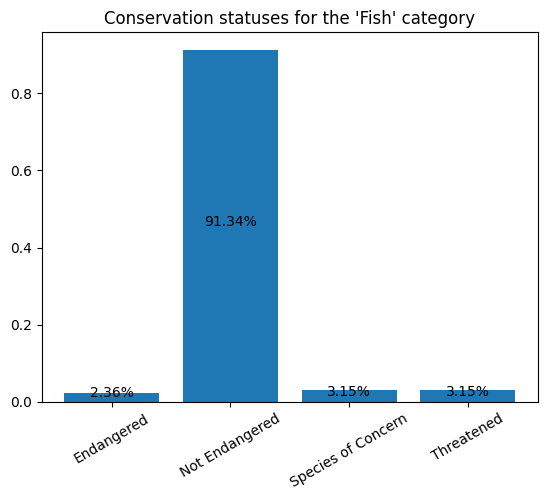

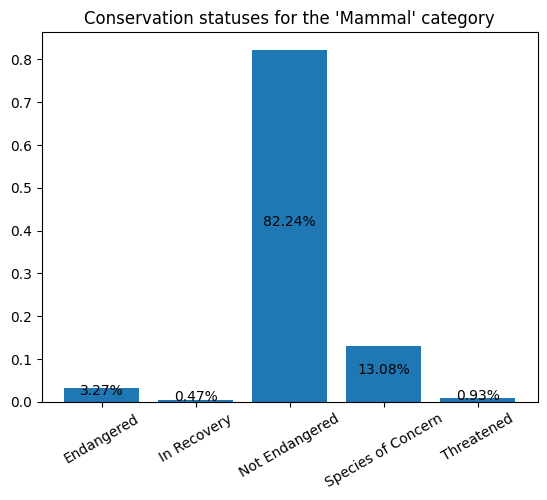

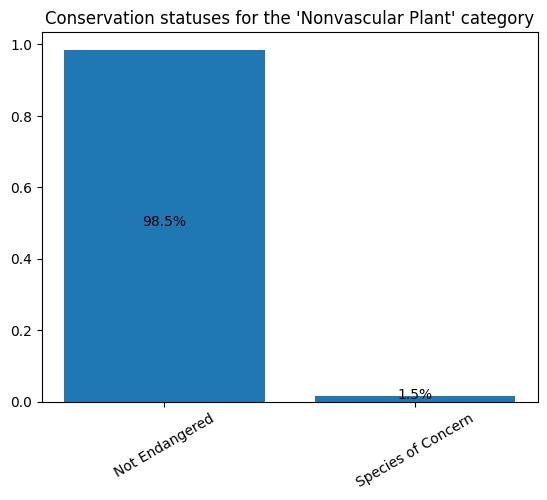

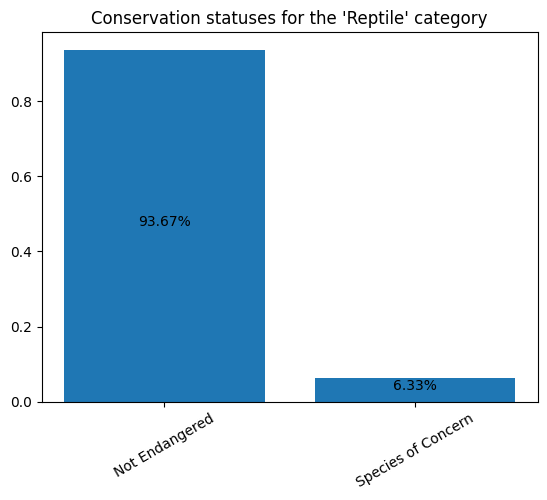

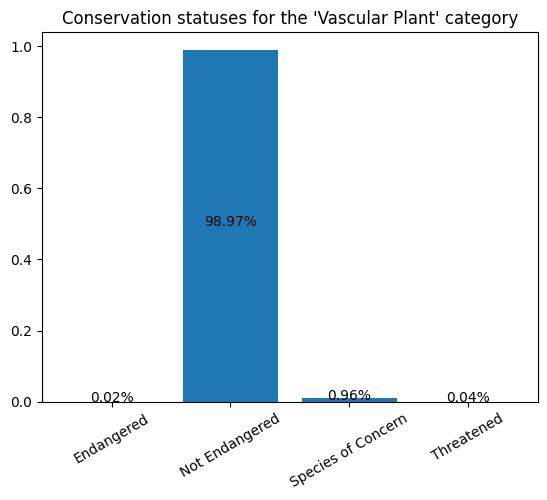

In [9]:
cat_status = data.groupby(['category', 'conservation_status']).scientific_name.count().reset_index()

print(cat_status)

def add_value_label_perc(x_list, y_list):
    for i in range(len(x_list)):
        plt.text(i, y_list[i]/2, str(round(100*y_list[i],2))+'%', ha = 'center')

for cat in cat_status.category.unique():
    x= list(cat_status[cat_status.category == cat]['conservation_status'])
    y= list(cat_status[cat_status.category == cat]['scientific_name']/(cat_status[cat_status.category == cat].scientific_name.sum()))
    plt.bar(x, y)
    plt.xticks(rotation = 30)
    add_value_label_perc(x,y)
    plt.title(f'Conservation statuses for the \'{cat}\' category')
    plt.show()
    plt.clf


We observe that 'Birds' and 'Mammals' show the smallest proportions of non-endangered species (less than 85%)
Both plants categories, vascular and non vascular, have the biggest % of non-endangered species, resp. 99% and 98.5%

By reshaping a little the cat_status table, we can make appear clearly the above considerations, and pave the way for an improved way of plotting

In [10]:
cat_status= cat_status.pivot(columns = 'conservation_status', index = 'category', values = 'scientific_name').reset_index()
cat_status = cat_status.fillna(value = {'Endangered': 0, 'In Recovery': 0, 'Threatened':0})



cat_status['total'] =cat_status['Not Endangered'] + cat_status['Species of Concern'] + cat_status['Endangered'] \
+ cat_status['Threatened']+ cat_status['In Recovery']

for status in ['Not Endangered', 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery', 'total']:
    cat_status[status] = round(cat_status[status]/cat_status['total'],2)

print(cat_status)    

conservation_status           category  Endangered  In Recovery  \
0                            Amphibian        0.01         0.00   
1                                 Bird        0.01         0.01   
2                                 Fish        0.02         0.00   
3                               Mammal        0.03         0.00   
4                    Nonvascular Plant        0.00         0.00   
5                              Reptile        0.00         0.00   
6                       Vascular Plant        0.00         0.00   

conservation_status  Not Endangered  Species of Concern  Threatened  total  
0                              0.91                0.05        0.02    1.0  
1                              0.85                0.14        0.00    1.0  
2                              0.91                0.03        0.03    1.0  
3                              0.82                0.13        0.01    1.0  
4                              0.98                0.02        0.00    1.0  
5

We'll plot the different statuses' %, with stacked bars
The 'Vascular Plant' category has a very high number of species compared to other categories. 
We already saw its different statuses above, so we will not include it in our plot, in order to ease the reading
We will also not show the 'Non Threatened' category, that we can anyway evaluate thanks to other categories counts

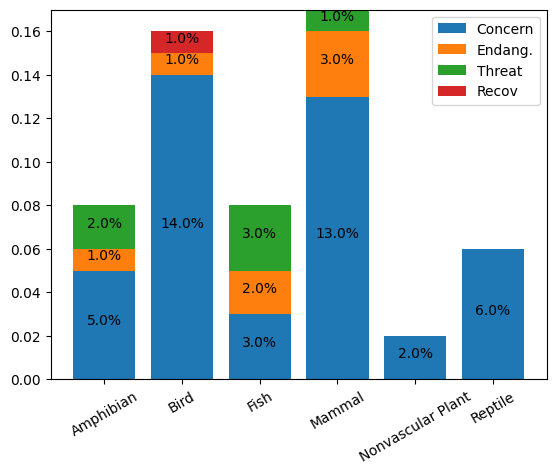

<Figure size 640x480 with 0 Axes>

In [11]:
b = cat_status[cat_status.category != 'Vascular Plant']['Species of Concern']
c = cat_status[cat_status.category != 'Vascular Plant']['Endangered']
d = cat_status[cat_status.category != 'Vascular Plant']['Threatened']
e = cat_status[cat_status.category != 'Vascular Plant']['In Recovery']

def add_value_label(x_list, y_list):
    for i in range(len(x_list)):
        if y_list[i] != 0:
            plt.text(i, (y_list[i]/2), str(round(100*y_list[i],2))+'%', ha = 'center')


def add_value_label_stacked(x_list, y_list,bottom_list):
    for i in range(len(x_list)):
        if y_list[i] != 0:
            plt.text(i, bottom_list[i]+(y_list[i]/2), str(round(100*y_list[i],2))+'%', ha = 'center')

d_bottom = np.add(b,c)
e_bottom = np.add(d_bottom,d)
x = cat_status[cat_status.category != 'Vascular Plant']['category']
plt.bar(x, b)
add_value_label(x,b)
plt.bar(x, c, bottom = b)
add_value_label_stacked(x,c,b)
plt.bar(x, d, bottom = d_bottom)
add_value_label_stacked(x,d,d_bottom)
plt.bar(x, e, bottom = e_bottom)
add_value_label_stacked(x,e,e_bottom)
plt.legend(['Concern', 'Endang.', 'Threat', 'Recov'])
plt.xticks(rotation = 30)
plt.show()
plt.clf()


Most endangered categories are 'Mammal' and 'Bird', as already highlighted. 
But most of their endangered species are at the lowest alert level, namely 'Species of Concern'
We see however that 'Amphibian' and 'Fish' have the biggest % of species with the highest alert level, namely 'Threatened'

### Observation patterns per category


We already approached the observation patterns when addressing the conservation statuses, but we would like to explore this topic a little more by checking whether some categories totalize a disproportionate number of observations, compared to their counts of species.The fact that we found earlier that observation numbers for each status is absolutely proportionate to count of species for this status is an indicator that we may find that each category is observed proportionnally to its count, since category has something to do with shares of respective status, but let's look at it more precisely. We will look at the overall level and then at the level of each park

Let's now calculate the ratios of the number of observations for a given category, divided by its count. 
If we see different values across categories, it will mean that some categories were observed in disproportion to their counts.

All categories mixed, each species of the dataset was in average observed 569.2 times

The 'Mammal' category totaled 564.8 observation per species

The 'Bird' category totaled 571.2 observation per species

The 'Reptile' category totaled 569.6 observation per species

The 'Amphibian' category totaled 576.8 observation per species

The 'Fish' category totaled 569.3 observation per species

The 'Vascular Plant' category totaled 568.9 observation per species

The 'Nonvascular Plant' category totaled 570.3 observation per species


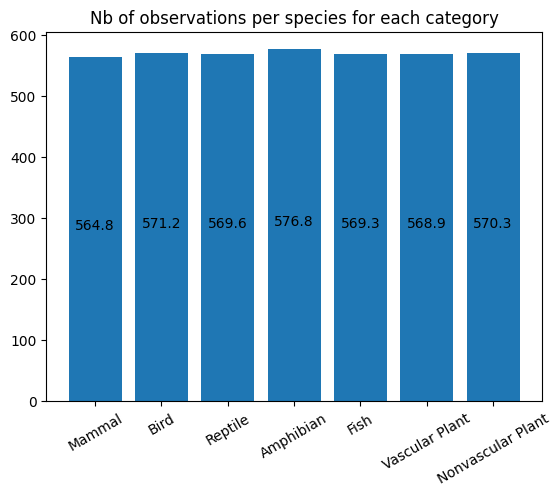

<Figure size 640x480 with 0 Axes>

In [12]:
print(f'All categories mixed, each species of the dataset was in average observed {round(data.total_obs.sum()/data.scientific_name.count(),1)} times')

def add_value_label(x_list, y_list):
    for i in range(len(x_list)):
        plt.text(i, y_list[i]/2, y_list[i], ha = 'center')

ratios = []

total = data.total_obs.sum()

for cat in data.category.unique():    
    a= round(data[data.category == cat].total_obs.sum()/data[data.category == cat].scientific_name.count(),1)
    ratios.append(a)
    print(f'\nThe \'{cat}\' category totaled {a} observation per species')

plt.bar(data.category.unique(), ratios)
plt.title('Nb of observations per species for each category')
add_value_label(data.category.unique(), ratios)
plt.xticks(rotation = 30)
plt.show()
plt.clf()

To this first question, we can answer that there are no significant differences between the observations per species across categories. The spread of the ratios is only 12 units, between the ratio for 'Mammal' and the ratio for 'Amphibian'. But this is only a 2% difference. It is possible that amphibians are more observed because they can be found in the water and on the earth. Therefore there are more captors that can potentially spot them.   

But let's see if we find the same situation in each park.

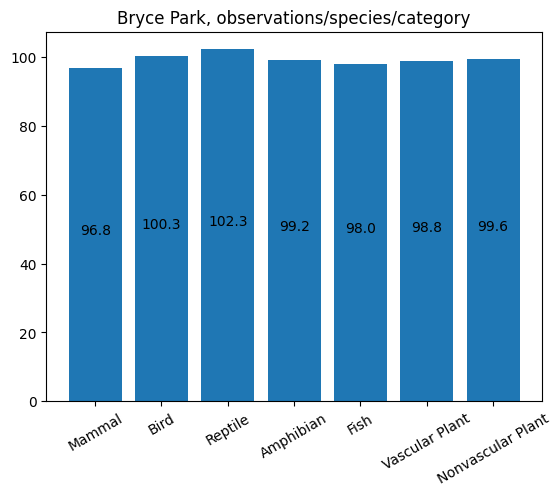

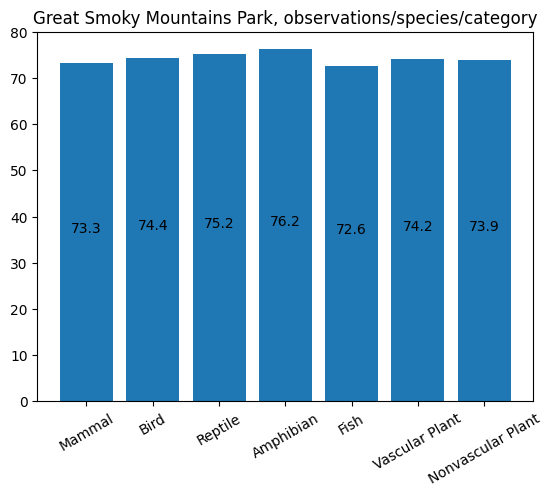

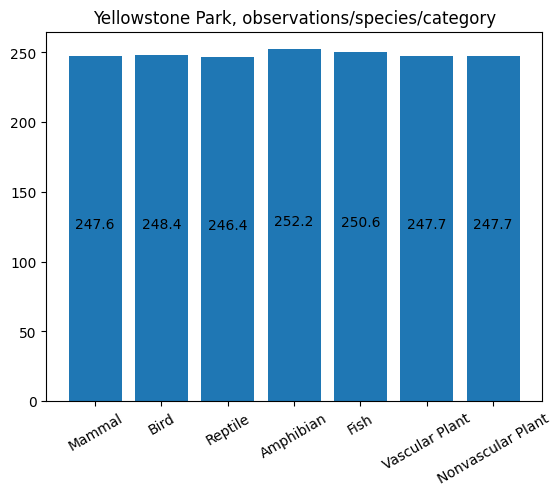

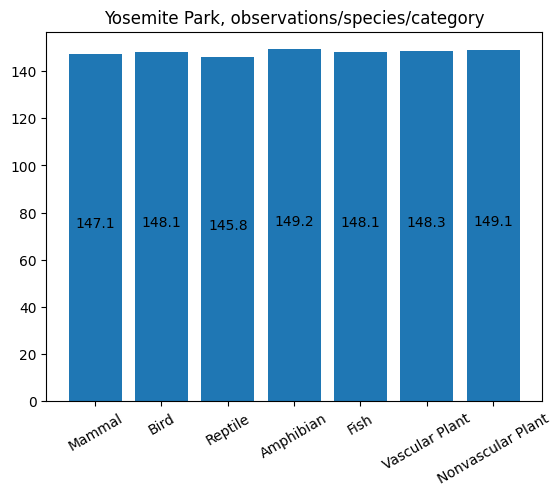

<Figure size 640x480 with 0 Axes>

In [13]:
park_ratios = [[],[],[],[]]

parks = ['Bryce', 'Great Smoky Mountains', 'Yellowstone', 'Yosemite']

for i in range(4):
    for cat in data.category.unique():
        park_ratios[i].append(round(data[data.category == cat][parks[i]].sum()/data[data.category == cat].scientific_name.count(),1))        
    plt.bar(data.category.unique(),park_ratios[i])
    plt.title(f'{parks[i]} Park, observations/species/category')
    add_value_label(data.category.unique(), park_ratios[i])
    plt.xticks(rotation = 30)
    plt.show()
    plt.clf()
    i+=1
                              


At park to park level, we do not see that some categories are observed a nb of times disproportionate to their count (no category is privileged).

### Outliers

We also would like to spot some outliers data points (in terms of observations) and observe their characteristics. Based on the distribution shown below, we will define them as the datapoints with a number of observations lower than 400 or higher than 700.

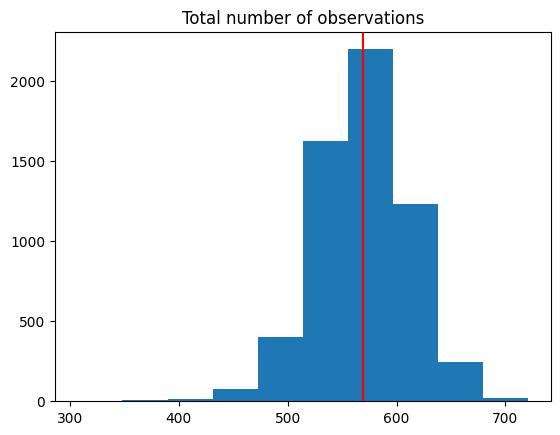

<Figure size 640x480 with 0 Axes>

In [14]:
plt.hist(data.total_obs)
plt.title('Total number of observations')
plt.axvline(x = data.total_obs.mean(),color = 'red')
plt.show()
plt.clf()

In [15]:
outliers_low = data[data.total_obs < 400].reset_index(drop = True)
outliers_high = data[data.total_obs>700].reset_index(drop = True)

print(outliers_low)
print(outliers_high)

            category                       scientific_name  \
0     Vascular Plant                    Agrostemma githago   
1     Vascular Plant                 Astragalus canadensis   
2     Vascular Plant                  Aureolaria laevigata   
3     Vascular Plant                   Prosartes maculatum   
4     Vascular Plant                 Aristida purpurascens   
5     Vascular Plant       Vulpia octoflora var. octoflora   
6  Nonvascular Plant                   Tetraphis pellucida   
7     Vascular Plant                 Penstemon whippleanus   
8     Vascular Plant                Thalictrum occidentale   
9     Vascular Plant  Lotus crassifolius var. crassifolius   

                             common_names conservation_status  Bryce  \
0           Common Corncockle, Corncockle      Not Endangered     89   
1                              Milk Vetch      Not Endangered     90   
2  Downy Yellow Foxglove, Smooth Gerardia      Not Endangered    108   
3                        Spot

Among the 'outliers_low' df, which is made of the 10 least observed species, we can observe a recurrent pattern: Bryce, Great Smoky Mountains, Yosemite parks approximately have numbers of observations equal to their means, however for 9 out of 10 species, the nb of observations in the Yellowstone park is 4 times lower. 

When it comes to the 'high outliers', the result seems to be more of a combination of numbers higher than average for the 4 parks, but without an impressive ratio (at most 1.5 times the mean)

Plotting, as below, the distributions for the observations in the respective parks puts in evidence the fact that the distribution for the 'Yellowstone' park shows a few outliers that are ~4 times lower than the mean. A similar pattern is visible for the 'Yosemite park', however the 'Bryce' and 'Great Smoky' distributions can be described as totally fitting the normal pattern. 

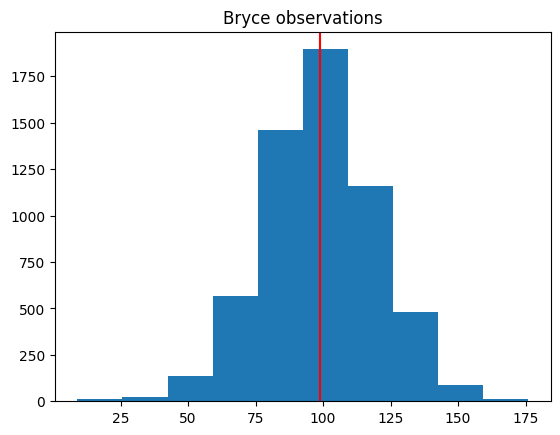

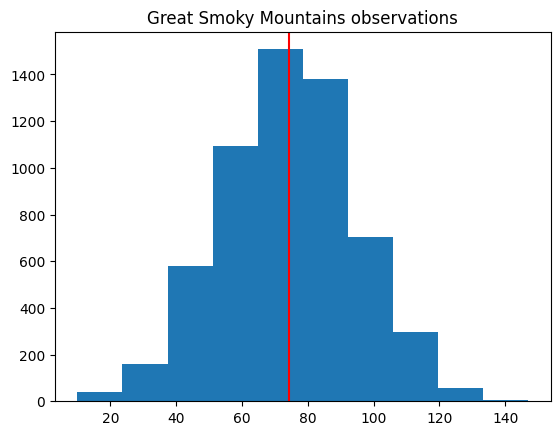

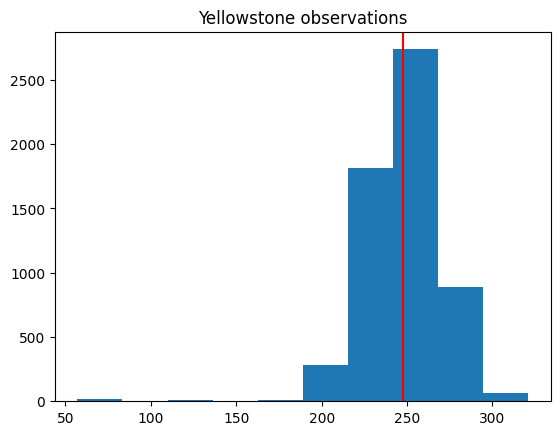

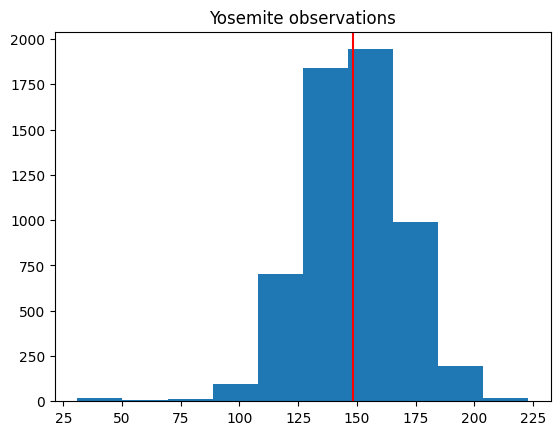

<Figure size 640x480 with 0 Axes>

In [16]:
plt.hist(data.Bryce)
plt.title('Bryce observations')
plt.axvline(x = data.Bryce.mean(),color = 'red')
plt.show()
plt.clf()

plt.hist(data['Great Smoky Mountains'])
plt.title('Great Smoky Mountains observations')
plt.axvline(x = data['Great Smoky Mountains'].mean(),color = 'red')
plt.show()
plt.clf()

plt.hist(data.Yellowstone)
plt.title('Yellowstone observations')
plt.axvline(x = data.Yellowstone.mean(),color = 'red')
plt.show()
plt.clf()

plt.hist(data.Yosemite)
plt.title('Yosemite observations')
plt.axvline(x = data.Yosemite.mean(),color = 'red')
plt.show()
plt.clf()

Given that the Yellowstone park is the one where the average number of observations is the highest (around 250/species), it is not a surprise if the species that are the low outliers of the Yellowstone observations are the ones that have the least total number of observations. Being a low outlier in the Yosemite observations has less impact, because in absolute value this comes to a lower delta. Therefore in the 10 datapoints with the least total observations, we find 9 Yellowstone low outliers, but only 1 Yosemite low outlier. 

Let us try to know more about these low outliers in Yellowstone and Yosemite parks. The 'outliers_low' dataframe tends to suggest that these are exclusively plants. 

In [17]:
print(f'There are {len(data[data.Yellowstone < 100])} data points with less than 100 observations (mean/2.5) in Yellowstone park')
print(data[data.Yellowstone < 100])


There are 16 data points with less than 100 observations (mean/2.5) in Yellowstone park
               category                        scientific_name  \
314                Bird                      Empidonax minimus   
1077     Vascular Plant                     Agrostemma githago   
1315     Vascular Plant                  Astragalus canadensis   
1633     Vascular Plant                   Aureolaria laevigata   
1717     Vascular Plant                    Prosartes maculatum   
2149     Vascular Plant                  Aristida purpurascens   
2579     Vascular Plant                        Rhus copallinum   
2734  Nonvascular Plant               Dicranodontium asperulum   
2748  Nonvascular Plant             Paraleucobryum longifolium   
3009  Nonvascular Plant                    Tetraphis pellucida   
3962     Vascular Plant                  Penstemon whippleanus   
4011     Vascular Plant                        Salix geyeriana   
4348     Vascular Plant                 Thalictrum occ

In [18]:
print(f'There are {len(data[data.Yosemite < 50])} data points with less than 100 observations (mean/3) in Yosemite park')
print(data[data.Yosemite < 50])


There are 16 data points with less than 100 observations (mean/3) in Yosemite park
            category                        scientific_name  \
64            Mammal                     Synaptomys cooperi   
125             Bird                        Melanitta nigra   
311             Bird                        Contopus virens   
937   Vascular Plant                      Solidago gigantea   
1911  Vascular Plant                   Botrychium oneidense   
2093  Vascular Plant                     Scirpus atrovirens   
2333  Vascular Plant        Vulpia octoflora var. octoflora   
2568  Vascular Plant                   Boehmeria cylindrica   
2604  Vascular Plant                Liquidambar styraciflua   
3460  Vascular Plant  Erigeron ochroleucus var. ochroleucus   
3489  Vascular Plant                        Ionactis alpina   
4162  Vascular Plant                         Juncus torreyi   
5002  Vascular Plant             Claytonia rubra ssp. rubra   
5091  Vascular Plant   Allophyllum 

In [19]:
print(f'There are {len(data[(data.Yosemite < 50) & (data.Yellowstone < 100)])} data points with less than 100 observations (mean/3) in Yosemite park')
print(data[(data.Yosemite < 50) & (data.Yellowstone < 100)])

There are 0 data points with less than 100 observations (mean/3) in Yosemite park
Empty DataFrame
Columns: [category, scientific_name, common_names, conservation_status, Bryce, Yellowstone, Yosemite, Great Smoky Mountains, total_obs]
Index: []


For each park, there are 16 datapoints belonging to the low outliers. There are no species common to the two sets of outliers. From the 32 species considered, 25 are Vascular Plants. 

How many of these dpoints are there among the 32 dpoints with the least amounts of total observations?

In [20]:
data = data.sort_values(by = ['total_obs']).reset_index(drop = True)

print(data[0:32][(data.Yellowstone <100) | (data.Yosemite < 50)])

             category                        scientific_name  \
0      Vascular Plant                  Penstemon whippleanus   
1      Vascular Plant   Lotus crassifolius var. crassifolius   
2   Nonvascular Plant                    Tetraphis pellucida   
3      Vascular Plant                     Agrostemma githago   
4      Vascular Plant                 Thalictrum occidentale   
5      Vascular Plant                  Astragalus canadensis   
6      Vascular Plant                   Aureolaria laevigata   
7      Vascular Plant                  Aristida purpurascens   
8      Vascular Plant        Vulpia octoflora var. octoflora   
9      Vascular Plant                    Prosartes maculatum   
10  Nonvascular Plant             Paraleucobryum longifolium   
11     Vascular Plant                        Salix geyeriana   
13     Vascular Plant                        Rhus copallinum   
14               Bird                        Melanitta nigra   
15     Vascular Plant                Liq

C:\Users\MartiEti\AppData\Local\Temp\ipykernel_21308\2347292800.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(data[0:32][(data.Yellowstone <100) | (data.Yosemite < 50)])


Out of the 32 records with lowest amounts of observations, 23 belong to the low outliers of Yellowstone or Yosemite. Almost all the Yellowstone outliers fit in these 32 records (15 out of 16).
In which range of the lowest amounts of observations can they fit all? Now that we sorted the data per ascending order of total observations, this is easy.

In [21]:
print(data[(data.Yellowstone <100) | (data.Yosemite < 50)])

              category                        scientific_name  \
0       Vascular Plant                  Penstemon whippleanus   
1       Vascular Plant   Lotus crassifolius var. crassifolius   
2    Nonvascular Plant                    Tetraphis pellucida   
3       Vascular Plant                     Agrostemma githago   
4       Vascular Plant                 Thalictrum occidentale   
5       Vascular Plant                  Astragalus canadensis   
6       Vascular Plant                   Aureolaria laevigata   
7       Vascular Plant                  Aristida purpurascens   
8       Vascular Plant        Vulpia octoflora var. octoflora   
9       Vascular Plant                    Prosartes maculatum   
10   Nonvascular Plant             Paraleucobryum longifolium   
11      Vascular Plant                        Salix geyeriana   
13      Vascular Plant                        Rhus copallinum   
14                Bird                        Melanitta nigra   
15      Vascular Plant   

These outliers fit in the subset of the 204 species with the least observations, that is, the 3.5% of lowest values. However, the 16 Yellowstone low outliers fit all in the subset of the 37 species with the least observations, that is, the 0.6% of lowest values.

# Conclusion

We at first focused on knowing the shape of the data and improving their structure for easier use. Observing that the base structure of the 'observations' dataset was merely the 'species' dataset multiplied by 4 in order to have one datapoint per species/park combination (5824 species * 4 = 23296 observations), we proceeded to a merge between the two datasets, by giving the number of observations per each park in a distinct column rather than line, as well as the total for the 4 parks alltogether. 

We also noticed that the species belong to 7 different categories, 2 vegetal and 5 animal, and are classified according to 5 conservation statuses. We changed the 'NaN' values in the conservation_status attribute to 'Not Endangered', so as to signify that the data are not missing, it's rather that there is no specific status to mention. 97% of the listed species are not endangered and were therefore subjected to this change.

Further, our investigation focused on trying to find patterns related to the conservation statuses. We found that there is no emphasis on observing species with some statuses preferably to others. Secondly, we found that species categories are not equal in front of the conservation statuses, with the animal categories, especially 'Bird' and 'Mammal', having a higher percentage of endangered species than the vegetal ones.

We continued to look for any pattern in the number of observations. There is not any when it comes to the categories of species, each category has a number of observations that is proportional to its count. 

By examining the outliers, however, we found that a few species were observed a remarkably low number of times, compared to average, in the Yosemite and Yellowstone parks. This small number of observations in Yellowstone and to a lesser extent in Yosemite park, is the reason why a species finds itself among the 10 least observed species. We isolated 16 outliers for each of the two parks and examined them. These are predominantly Vascular Plants. 23 of the outliers (of which 15 from the Yellowstone outliers) are among the 32 species with the lowest numbers of observations. The Yellowstone outliers are among the 0.6% of records with the lowest amounts, the 32 outliers are among the 3.5% of records with the lowest amount.